<a href="https://colab.research.google.com/github/hitasu/Car-racing-Game---C-Graphics/blob/master/poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook explores developing an algorithm for comparing two 5-card poker hands to determine which is stronger using the following table.

You can watch me code this in real time in this [YouTube Video](https://youtu.be/PZLCOgubhEE).

You can find the [distribution of poker hands](https://en.wikipedia.org/wiki/Poker_probability) on wikipedia.

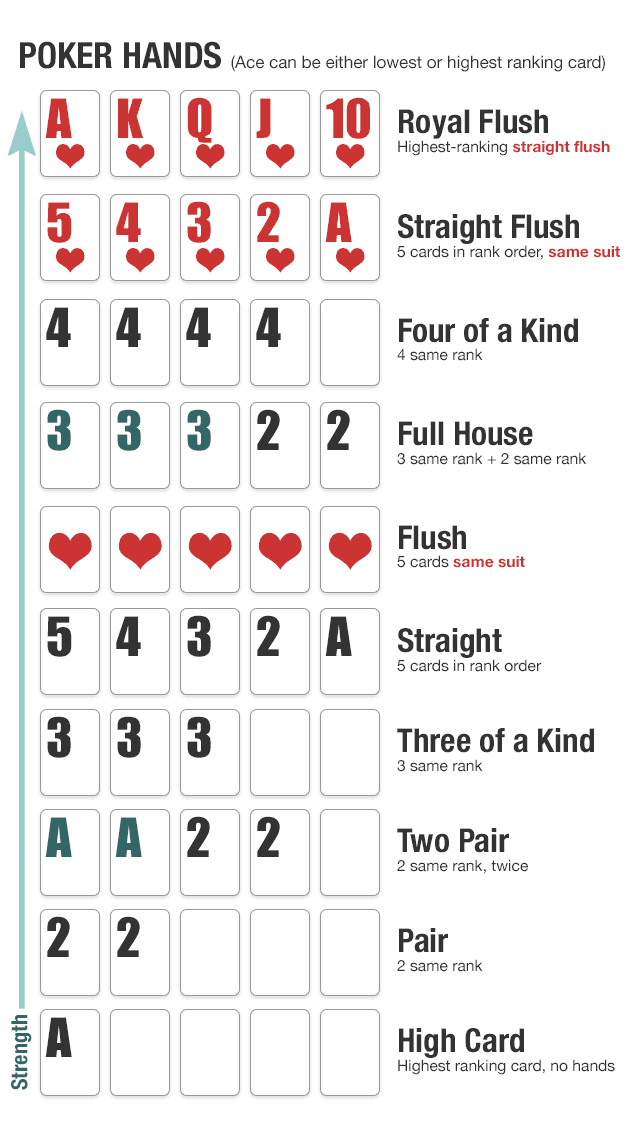

In [ ]:
test_hands = [
    ["AC", "5C", "10C", "7C", "3S"],
    ["2C", "3D", "4S", "5H", "2D"],
    ["2C", "3D", "4S", "3H", "2D"],
    ["5S", "4C", "AD", "4S", "4H"],
    ["3H", "7H", "6S", "4D", "5S"],
    ["AC", "5C", "10C", "7C", "3C"],
    ["5C", "8D", "5H", "8S", "8H"],
    ["3D", "7H", "7S", "7C", "7D"],
    ["AS", "10S", "QS", "KS", "JS"],
]

In [ ]:
def suit(card):
  return card[-1]

In [ ]:
suit("AC")

'C'

In [ ]:
suit("10D")

'D'

In [ ]:
def value(card):
  if card[0] == "A":
    return 14
  if card[0] == "J":
    return 11
  if card[0] == "Q":
    return 12
  if card[0] == "K":
    return 13
  return int(card[0:-1])

In [ ]:
value("AC")

14

In [ ]:
value("10D")

10

In [ ]:
def is_flush(cards):
  return all([suit(card) == suit(cards[0]) for card in cards[1:]])

In [ ]:
[is_flush(hand) for hand in test_hands]

[False, False, False, False, False, True, False, False, True]

In [ ]:
def hand_dist(cards):
  dist = {i:0 for i in range(1, 15)}
  for card in cards:
    dist[value(card)] += 1
  dist[1] = dist[14]
  return dist

In [ ]:
[hand_dist(hand) for hand in test_hands]

[{1: 1,
  2: 0,
  3: 1,
  4: 0,
  5: 1,
  6: 0,
  7: 1,
  8: 0,
  9: 0,
  10: 1,
  11: 0,
  12: 0,
  13: 0,
  14: 1},
 {1: 0,
  2: 2,
  3: 1,
  4: 1,
  5: 1,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 {1: 0,
  2: 2,
  3: 2,
  4: 1,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 {1: 1,
  2: 0,
  3: 0,
  4: 3,
  5: 1,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 1},
 {1: 0,
  2: 0,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 {1: 1,
  2: 0,
  3: 1,
  4: 0,
  5: 1,
  6: 0,
  7: 1,
  8: 0,
  9: 0,
  10: 1,
  11: 0,
  12: 0,
  13: 0,
  14: 1},
 {1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 2,
  6: 0,
  7: 0,
  8: 3,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 {1: 0,
  2: 0,
  3: 1,
  4: 0,
  5: 0,
  6: 0,
  7: 4,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0},
 {1: 1,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,


In [ ]:
def straight_high_card(cards):
  dist = hand_dist(cards)
  for value in range(1, 11):
    if all([dist[value + k] == 1 for k in range(5)]):
      return value + 4
      
  return None

In [ ]:
[straight_high_card(hand) for hand in test_hands]

[None, None, None, None, 7, None, None, None, 14]

In [ ]:
def card_count(cards, num, but=None):
  dist = hand_dist(cards)
  for value in range(2, 15):
    if value == but:
      continue
    if dist[value] == num:
      return value
  return None

In [ ]:
[card_count(hand, 2, 2) for hand in test_hands]

[None, None, 3, None, None, None, 5, None, None]

In [ ]:
def hand_rank(cards):
  if straight_high_card(cards) is not None and is_flush(cards):
    return 8
  if card_count(cards, 4) is not None:
    return 7
  if card_count(cards, 3) is not None and card_count(cards, 2) is not None:
    return 6
  if is_flush(cards):
    return 5
  if straight_high_card(cards) is not None:
    return 4
  if card_count(cards, 3) is not None:
    return 3
  pair1 = card_count(cards, 2)
  if pair1 is not None:
    if card_count(cards, 2, but=pair1) is not None:
      return 2
    return 1
  return 0

In [ ]:
[hand_rank(hand) for hand in test_hands]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
def compare_hands(hand1, hand2):
  r1 = hand_rank(hand1)
  r2 = hand_rank(hand2)
  if r1 < r2:
    return -1
  if r1 > r2:
    return 1
  # Need to add test for high cards - tie breakers
  return 0

In [ ]:
compare_hands(test_hands[4], test_hands[4])

0

In [ ]:
def make_deck():
  deck = []
  for suit in ("D", "C", "H", "S"):
    for value in range(2, 15):
      if value < 11:
        value_string = str(value)
      else:
        value_string = ("J", "Q", "K", "A")[value - 11]
      deck.append(value_string + suit)
  return deck

In [ ]:
len(make_deck())

52

In [ ]:
import random

In [ ]:
def shuffled_deck():
  deck = make_deck()
  random.shuffle(deck)
  return deck

In [ ]:
shuffled_deck()

['7C',
 '10C',
 '8S',
 '4C',
 '8C',
 'QD',
 '7S',
 '9C',
 '4S',
 '3H',
 '5C',
 'JH',
 'KC',
 '9S',
 '6C',
 '8D',
 '2H',
 'AS',
 '9H',
 '10S',
 '7H',
 '5D',
 '10H',
 '2D',
 'JD',
 'AD',
 '2C',
 'JS',
 '9D',
 '8H',
 'KD',
 '4H',
 '2S',
 '6S',
 '3S',
 'QH',
 '6D',
 '5H',
 '7D',
 '4D',
 '6H',
 '3D',
 'AC',
 '5S',
 'QS',
 'KH',
 '3C',
 'QC',
 'KS',
 '10D',
 'JC',
 'AH']

In [ ]:
def deal(deck, n):
  hand = deck[0:n]
  del deck[0:n]
  return hand

In [ ]:
deck = shuffled_deck()

In [ ]:
deck

['KC',
 'JD',
 '8S',
 'QC',
 'QS',
 'AC',
 'AD',
 'QH',
 '9D',
 '6S',
 '10D',
 '6H',
 '2D',
 '4H',
 'JC',
 '5S',
 '8H',
 'KD',
 '3C',
 '3H',
 '10S',
 '5C',
 'AH',
 '10H',
 '7S',
 'KS',
 '2S',
 'AS',
 '10C',
 'JS',
 '3D',
 '9C',
 '7C',
 '2H',
 '6C',
 '9H',
 '2C',
 '4S',
 '5D',
 '9S',
 'KH',
 '5H',
 '4C',
 'QD',
 'JH',
 '3S',
 '7D',
 '6D',
 '4D',
 '7H',
 '8D',
 '8C']

In [ ]:
deal(deck, 5)

['KC', 'JD', '8S', 'QC', 'QS']

In [ ]:
len(deck)

47

In [ ]:
deck

['AC',
 'AD',
 'QH',
 '9D',
 '6S',
 '10D',
 '6H',
 '2D',
 '4H',
 'JC',
 '5S',
 '8H',
 'KD',
 '3C',
 '3H',
 '10S',
 '5C',
 'AH',
 '10H',
 '7S',
 'KS',
 '2S',
 'AS',
 '10C',
 'JS',
 '3D',
 '9C',
 '7C',
 '2H',
 '6C',
 '9H',
 '2C',
 '4S',
 '5D',
 '9S',
 'KH',
 '5H',
 '4C',
 'QD',
 'JH',
 '3S',
 '7D',
 '6D',
 '4D',
 '7H',
 '8D',
 '8C']

In [ ]:
rank_names = ["high card", "pair", "two pair", "three of a kind", "straight", "flush", "full house",
"four of a kind", "straight flush"]

In [ ]:
def show_compare_hands(hand1, hand2):
  sgn = compare_hands(hand1, hand2)
  result = ("loses to", "ties", "beats")[sgn + 1]
  print(f'{hand1} {result} {hand2}')
  r1 = hand_rank(hand1)
  r2 = hand_rank(hand2)
  print(f'{rank_names[r1]} {result} {rank_names[r2]}')

In [ ]:
hand1 = deal(deck, 5)
hand2 = deal(deck, 5)

In [ ]:
hand1

['AC', 'AD', 'QH', '9D', '6S']

In [ ]:
hand2

['10D', '6H', '2D', '4H', 'JC']

In [ ]:
show_compare_hands(hand1, hand2)

['AC', 'AD', 'QH', '9D', '6S'] beats ['10D', '6H', '2D', '4H', 'JC']
pair beats high card


In [ ]:
def test_random_hands(n=20):
  for i in range(n):
    deck = shuffled_deck()
    show_compare_hands(deal(deck, 5), deal(deck, 5))

In [ ]:
test_random_hands()

['10C', '4H', 'QS', '2H', '10D'] beats ['9H', 'KS', '3S', '2D', 'JD']
pair beats high card
['10D', 'QH', '9S', '6S', '3D'] loses to ['7S', 'KC', 'AC', 'JC', 'KD']
high card loses to pair
['AD', '2H', '7H', '4D', 'KS'] loses to ['2S', 'JC', '8S', '5H', 'JS']
high card loses to pair
['10H', '6H', '4C', '2D', '4S'] beats ['7C', 'QD', '5S', '2H', 'JS']
pair beats high card
['7H', '7C', '3S', 'AC', 'QC'] ties ['AD', '5C', '8S', '8C', '6D']
pair ties pair
['QD', 'JH', 'AH', '6C', 'AD'] ties ['5H', '8D', '5D', '9S', 'JC']
pair ties pair
['4D', '7S', '7D', '2C', '6C'] loses to ['KC', '9H', '3S', '9S', '9C']
pair loses to three of a kind
['10C', '4D', '2C', '6C', 'QC'] ties ['9H', '8S', '4S', 'JC', '7D']
high card ties high card
['7C', '9H', '4S', '4C', '4H'] beats ['8D', 'AS', 'AH', '3H', 'KH']
three of a kind beats pair
['AC', '2S', '4D', '9D', 'AS'] beats ['7S', '10S', '5H', 'QH', '2H']
pair beats high card
['10S', '9H', 'KD', 'QH', '2C'] loses to ['5H', '5C', '8S', 'QS', '4C']
high card los

In [ ]:
def rank_distribution(n=100000):
  dist = {i: 0 for i in range(9)}
  for i in range(n):
    deck = shuffled_deck()
    hand = deal(deck, 5)
    dist[hand_rank(hand)] += 1

  for r in range(9):
    print(f'{rank_names[r]}: {dist[r]} ({100 * dist[r] / n}%)')

In [ ]:
rank_distribution()

high card: 49779 (49.779%)
pair: 42513 (42.513%)
two pair: 4769 (4.769%)
three of a kind: 2136 (2.136%)
straight: 416 (0.416%)
flush: 214 (0.214%)
full house: 141 (0.141%)
four of a kind: 31 (0.031%)
straight flush: 1 (0.001%)
